# Q-AnT Manual

Quantitative Analysis Trading (Q-AnT) is a platform to gather and manage information about corporate shares.

This document explains the most important steps in the usage of Q-Ant. It includes the basic commands to perform operation, run the classification algorithm and download input data.

## Initialize

In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import datetime as dt
import time as tt
from QAnT import stock
from QAnT import Index
import datetime

from scipy.stats import norm
from scipy.stats import levy
import matplotlib.mlab as mlab

# Basic functions of the stock and index classes

## Initialization
The initialization of the stock and index classes is done by the following commands:

In [2]:
s = stock(debug=True, verbose=True)

In [3]:
i = Index(debug=True, verbose=True)

2018-01-26 16:00:27  ^GDAXI        DAX               |deb|  Reading saved quote for all indices
2018-01-26 16:00:29  ^GDAXI        DAX               |deb|  Found 141442 quotes in database
2018-01-26 16:00:29  ^GDAXI        DAX               |deb|  Splitting quote_saved into dictionary


## Search the stock database
We can search the database by the name of the company.

In [6]:
s = stock(verbose=True)
search_results = s.find_by_name("PROCTER")
search_results

,name,isin,ticker_YF,ticker_MS,branch,benchmark,finanzen_net
2037,PROCTER GAMBLE,US7427181091,PRG,PG,0.0,^GSPC,ProcterGamble


# Downloading data
## Download keyratios from MorningStar and save to database

If we have new companies in our database, we may want to download the keyratios from morningstar.

In [4]:
s.switch_isin('US7427181091')
s.ticker_ms = 'PRG'
s.load_keyratios(deletecsv=False)

2018-01-26 14:40:30  US7427181091  PROCTER GAMBLE    |log|  Changed to new stock
2018-01-26 14:40:30  US7427181091  PROCTER GAMBLE    |deb|  New stock selected - PROCTER GAMBLE
2018-01-26 14:40:30  US7427181091  PROCTER GAMBLE    |deb|  ISIN & Ticker:       US7427181091, PRG
2018-01-26 14:40:30  US7427181091  PROCTER GAMBLE    |deb|  Reading saved quote
2018-01-26 14:40:30  US7427181091  PROCTER GAMBLE    |log|  Found 4546 quotes
2018-01-26 14:40:31  US7427181091  PROCTER GAMBLE    |log|  Found 0 keyratios
2018-01-26 14:40:32  US7427181091  PROCTER GAMBLE    |deb|  Writing output to tmpfiles/US_PRG.csv
2018-01-26 14:40:32  US7427181091  PROCTER GAMBLE    |log|  Name: PROCTER GAMBLE         |    Procter & Gamble Co
2018-01-26 14:40:32  US7427181091  PROCTER GAMBLE    |deb|  Correcting column names
2018-01-26 14:40:32  US7427181091  PROCTER GAMBLE    |deb|  Formatting keyratios
2018-01-26 14:40:32  US7427181091  PROCTER GAMBLE    |deb|  Cleaning up the column strings
2018-01-26 14:40:32 

## Download quotes from Yahoo

Let's select the Munich Re stock and download the quote. There are two different modes of operation for the quote downloading algorithm. If the algorithm is called for the first time, Q-AnT tries all exchanges and selects that with the largest available data set. If quotes are already stored for the stock, Q-AnT uses the same exchange as for the previous data. 

In [11]:
s.switch_isin('US7427181091')

2017-12-11 21:16:05  US7427181091  PROCTER GAMBLE    |deb|  Switched to new stock: PROCTER GAMBLE
2017-12-11 21:16:05  US7427181091  PROCTER GAMBLE    |deb|  ISIN & Ticker:         US7427181091, PRG
2017-12-11 21:16:05  US7427181091  PROCTER GAMBLE    |deb|  Reading saved quote
2017-12-11 21:16:06  US7427181091  PROCTER GAMBLE    |log|  Found 0 quotes


In [12]:
s._download_quote_yahoo()

2017-12-11 21:16:07  US7427181091  PROCTER GAMBLE    |log|  Donwloading quote with ticker symbol PRG
2017-12-11 21:16:07  US7427181091  PROCTER GAMBLE    |log|  Found the following unit of the key ratios: EUR
2017-12-11 21:16:08  US7427181091  PROCTER GAMBLE    |log|  Attempts to load PRG.VI quote: 1/5
2017-12-11 21:16:10  US7427181091  PROCTER GAMBLE    |log|  Attempts to load PRG.VI quote: 2/5
2017-12-11 21:16:11  US7427181091  PROCTER GAMBLE    |log|  Attempts to load PRG.VI quote: 3/5
2017-12-11 21:16:13  US7427181091  PROCTER GAMBLE    |log|  Attempts to load PRG.VI quote: 4/5
2017-12-11 21:16:14  US7427181091  PROCTER GAMBLE    |log|  Attempts to load PRG.VI quote: 5/5
2017-12-11 21:16:16  US7427181091  PROCTER GAMBLE    |log|  Attempts to load PRG.DE quote: 1/5
2017-12-11 21:16:18  US7427181091  PROCTER GAMBLE    |log|  Attempts to load PRG.DE quote: 2/5
2017-12-11 21:16:19  US7427181091  PROCTER GAMBLE    |log|  Attempts to load PRG.DE quote: 3/5
2017-12-11 21:16:21  US74271810

/home/phermes/.conda/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



2017-12-11 21:16:55  US7427181091  PROCTER GAMBLE    |deb|  Reading saved quote
2017-12-11 21:16:55  US7427181091  PROCTER GAMBLE    |log|  Found 0 quotes
2017-12-11 21:16:55  US7427181091  PROCTER GAMBLE    |log|  Found 4546 quotes to save
2017-12-11 21:16:55  US7427181091  PROCTER GAMBLE    |deb|  Currency of quote_to_save: ['EUR']
2017-12-11 21:16:55  US7427181091  PROCTER GAMBLE    |deb|  Currency of quote_saved  : []
2017-12-11 21:16:55  US7427181091  PROCTER GAMBLE    |log|  No quote saved, adding new entry
2017-12-11 21:16:55  US7427181091  PROCTER GAMBLE    |log|  Successfully saved 4546 entries in quote database


## Download Quarterly Report Dates 

In [6]:
s.debug=False
s._save_unsaved_quarterly_report_dates()

2017-12-06 11:31:25  DE0008430026  MUENCH.RUECKVERS. |log|  Downloading quarterly report dates from
2017-12-06 11:31:25  DE0008430026  MUENCH.RUECKVERS. |log|  http://www.finanzen.net/termine/Muenchener_Rueck
2017-12-06 11:31:25  DE0008430026  MUENCH.RUECKVERS. |log|  Found quarterly report table with 4 entries
2017-12-06 11:31:25  DE0008430026  MUENCH.RUECKVERS. |log|  Reading saved quarterly report dates
2017-12-06 11:31:25  DE0008430026  MUENCH.RUECKVERS. |log|  Found 1 quarterly report dates to save
2017-12-06 11:31:25  DE0008430026  MUENCH.RUECKVERS. |log|  Successfully saved 1 entries in quarterly report database
2017-12-06 11:31:25  DE0008430026  MUENCH.RUECKVERS. |log|  Reading saved quarterly report dates


# Deploying the algorithm

## Quantitative Analysis of Fundamentals and Quotes

Run the Q-AnT algorithm for the stock presently loaded. 

In [6]:
s.get_summary(save=True)

2017-12-06 10:43:07  DE0005408116  AAREAL BANK AG    |log|  Earnings Growth: 0.07962780402683078
2017-12-06 10:43:07  DE0005408116  AAREAL BANK AG   |err|  PresentRoIC is of type None
2017-12-06 10:43:07  DE0005408116  AAREAL BANK AG    |log|  Financial company, applying different criteria for equity ratio
2017-12-06 10:43:07  DE0005408116  AAREAL BANK AG    |log|  Checking dividend growth
2017-12-06 10:43:07  DE0005408116  AAREAL BANK AG    |log|  Latest dividend 1.2
2017-12-06 10:43:07  DE0005408116  AAREAL BANK AG    |log|  Previous dividend nan
2017-12-06 10:43:07  DE0005408116  AAREAL BANK AG    |log|  Calculating fair price from P/E ratio
2017-12-06 10:43:07  DE0005408116  AAREAL BANK AG    |log|  Selected quantile: 0.5
2017-12-06 10:43:07  DE0005408116  AAREAL BANK AG    |log|  Connected to sqlite database algo_results.db
2017-12-06 10:43:07  DE0005408116  AAREAL BANK AG    |log|  Removing old output
2017-12-06 10:43:07  DE0005408116  AAREAL BANK AG    |log|  Adding new result
2

Show the result of the quantitative analysis

In [7]:
s.quant_result

,Name,ISIN,Parameter,Value,Point
0,AAREAL BANK AG,DE0005408116,OnlyPositiveEarnings,0,1
1,AAREAL BANK AG,DE0005408116,AnnualEarningsGrowth,8.0,1
2,AAREAL BANK AG,DE0005408116,BookValueGrowth,69.2,0
3,AAREAL BANK AG,DE0005408116,HistoricROE,3.3,-1
4,AAREAL BANK AG,DE0005408116,PresentROE,7.0,-1
5,AAREAL BANK AG,DE0005408116,PresentRoIC,0.0,-1
6,AAREAL BANK AG,DE0005408116,EquityRatio,6.0,0
7,AAREAL BANK AG,DE0005408116,EBTMargin,100.0,1
8,AAREAL BANK AG,DE0005408116,DividendGrowth,nan,0
9,AAREAL BANK AG,DE0005408116,SixMonthReturn,-6.2,-1


In [8]:
s.summary

,Name,ISIN,FairPrice,FairPricePE,Price,Points
0,AAREAL BANK AG,DE0005408116,110.642442,29.418995,35.994999,0


If we want to save the output to 

    output/algo_results.db
    
we can use the save option. The conservative option is used to specify wheter the calculation of the fair price should take into account earnings growth which is determined from historical earnings growth.

In [7]:
s.get_summary(save=True,conservative=True)
s.analyze_quote()

2017-12-06 11:35:19  DE0008430026  MUENCH.RUECKVERS. |log|  Earnings Growth: -0.0025444379905804615
2017-12-06 11:35:19  DE0008430026  MUENCH.RUECKVERS.|err|  PresentRoIC is of type None
2017-12-06 11:35:19  DE0008430026  MUENCH.RUECKVERS. |log|  Financial company, applying different criteria for equity ratio
2017-12-06 11:35:19  DE0008430026  MUENCH.RUECKVERS. |log|  Checking dividend growth
2017-12-06 11:35:19  DE0008430026  MUENCH.RUECKVERS. |log|  Latest dividend 7.75
2017-12-06 11:35:19  DE0008430026  MUENCH.RUECKVERS. |log|  Previous dividend nan
2017-12-06 11:35:19  DE0008430026  MUENCH.RUECKVERS. |log|  Calculating fair price from P/E ratio
2017-12-06 11:35:19  DE0008430026  MUENCH.RUECKVERS. |log|  Selected quantile: 0.5
2017-12-06 11:35:19  DE0008430026  MUENCH.RUECKVERS. |log|  Connected to sqlite database algo_results.db
2017-12-06 11:35:19  DE0008430026  MUENCH.RUECKVERS. |log|  Removing old output
2017-12-06 11:35:19  DE0008430026  MUENCH.RUECKVERS. |log|  Adding new resu

In [12]:
s.quant_result

,Name,ISIN,Parameter,Value,Point
0,MUENCH.RUECKVERS.VNA O.N.,DE0008430026,OnlyPositiveEarnings,0,1
1,MUENCH.RUECKVERS.VNA O.N.,DE0008430026,AnnualEarningsGrowth,-0.3,-1
2,MUENCH.RUECKVERS.VNA O.N.,DE0008430026,BookValueGrowth,72.5,0
3,MUENCH.RUECKVERS.VNA O.N.,DE0008430026,HistoricROE,3.1,-1
4,MUENCH.RUECKVERS.VNA O.N.,DE0008430026,PresentROE,8.3,-1
5,MUENCH.RUECKVERS.VNA O.N.,DE0008430026,PresentRoIC,0.0,-1
6,MUENCH.RUECKVERS.VNA O.N.,DE0008430026,EquityRatio,11.8,1
7,MUENCH.RUECKVERS.VNA O.N.,DE0008430026,EBTMargin,6.2,0
8,MUENCH.RUECKVERS.VNA O.N.,DE0008430026,DividendGrowth,nan,0
9,MUENCH.RUECKVERS.VNA O.N.,DE0008430026,SixMonthReturn,3.7,0


We can have a look at the fair price calculated by means of different valuation models. 

In [13]:
s.price, s.fairprice_low, s.fairprice_high, s.fairprice_pe

(183.89999399999999,
 395.60890352349668,
 393.06927705589942,
 128.63416001283358)

# Study daily returns, outperformance, covariance etc.

We can merge two quote dataframes to study covariance or outperformance. 

In [4]:
from QAnT.risk import merge_quotes

## Correlation

Let's study the covariance first between Coca-Cola and Pepsi and then between Coca-Cola and VISA.
### Between Coca Cola and Pepsi

In [20]:
s.find_by_name("PEPS")

,name,isin,ticker_YF,ticker_MS,branch,benchmark,finanzen_net
1941,"PEPSICO INC. DL-,0166",US7134481081,PEP,PEP,0.0,^GSPC,PepsiCo


In [5]:
cocac = stock(isin='US1912161007')
pepsi = stock(isin='US7134481081')
visa  = stock(isin='US92826C8394')

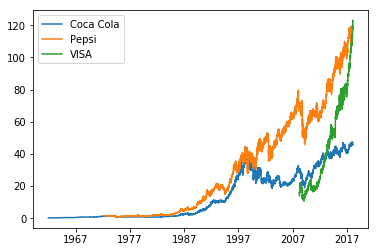

In [16]:
plt.plot(cocac.quote['date'],cocac.quote['close'],label='Coca Cola')
plt.plot(pepsi.quote['date'],pepsi.quote['close'],label='Pepsi')
plt.plot(visa.quote['date'],visa.quote['close'],label='VISA')

plt.legend()
plt.show()

In [6]:
allquotes = merge_quotes(cocac,pepsi, visa)
allquotes.head()

,date,return_COCA-C,return_PEPSIC,return_VISA I
0,2008-03-19,0.009173,0.002280,NaN
1,2008-03-20,0.017693,0.014187,0.121989
2,2008-03-24,0.002288,0.003639,-0.077348
3,2008-03-25,0.003745,0.001258,0.055652
4,2008-03-26,-0.004252,-0.005340,0.011101


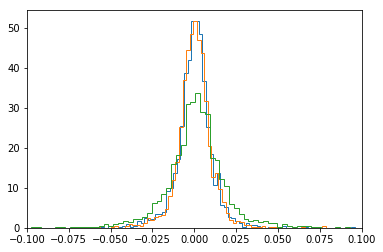

In [7]:
plt.hist(allquotes['return_COCA-C'].dropna(),bins=100,histtype='step', normed=True)
plt.hist(allquotes['return_PEPSIC'].dropna(),bins=100,histtype='step', normed=True)
plt.hist(allquotes['return_VISA I'].dropna(),bins=100,histtype='step', normed=True)

plt.xlim(-0.1,0.1)
plt.show()

In [40]:
covmatrix = allquotes.cov()
covmatrix

,return_COCA-C,return_PEPSIC,return_VISA I
return_COCA-C,0.000134,0.000086,0.000071
return_PEPSIC,0.000086,0.000119,0.000075
return_VISA I,0.000071,0.000075,0.000366


In [10]:
allquotes.describe()

,return_COCA-C,return_PEPSIC,return_VISA I
count,2478.000000,2478.000000,2477.000000
mean,0.000119,0.000159,0.000690
std,0.011565,0.010905,0.019133
min,-0.094919,-0.135478,-0.157990
25%,-0.004945,-0.005095,-0.007839
50%,0.000443,0.000228,0.001004
75%,0.005658,0.005570,0.009432
max,0.121879,0.078769,0.130415


In [13]:
w1 = np.arange(0,1,0.01)
w2 = 1-w1

In [45]:
cov  = covmatrix[allquotes.keys()[1]][allquotes.keys()[3]]
var1 = allquotes[allquotes.keys()[1]].std()**2
var2 = allquotes[allquotes.keys()[3]].std()**2
r1   = allquotes[allquotes.keys()[1]].mean()
r2   = allquotes[allquotes.keys()[3]].mean()

In [49]:
def _portfolio_return_var(r1,r2,w1,w2,var1,var2,cov):
    preturn   = w1*r1 + w2*r2
    pvariance = w1*w1*var1 + w2*w2*var2
    pvariance = pvariance + 2*w1*w2*cov
    return preturn, pvariance

def portfolio_return_var(allquotes,col1,col2):
    cov  = covmatrix[allquotes.keys()[col1]][allquotes.keys()[col2]]
    var1 = allquotes[allquotes.keys()[col1]].std()**2
    var2 = allquotes[allquotes.keys()[col2]].std()**2
    r1   = allquotes[allquotes.keys()[col1]].mean()
    r2   = allquotes[allquotes.keys()[col2]].mean()
    return _portfolio_return_var(r1,r2,w1,w2,var1,var2,cov)

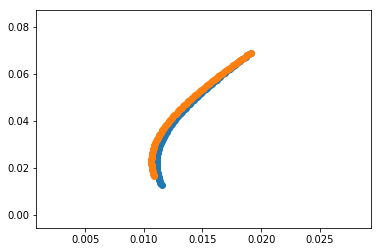

In [58]:
for j in range(1,3):
    output = []
    for w1 in np.arange(0,1,0.01):
        w2 = 1-w1
        preturn, pvariance = portfolio_return_var(allquotes,j,3)
        output.append([w1,preturn,pvariance])
    output = pd.DataFrame(output,columns=['w1','pret','pvar'])

    plt.scatter(np.sqrt(output['pvar']),output['pret']*100)
plt.show()

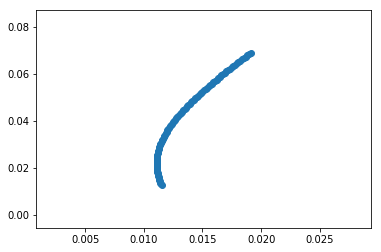

In [57]:
plt.scatter(np.sqrt(output['pvar']),output['pret']*100)
plt.show()

## Multi asset portfolios

In [224]:
def _get_returns_variance(allquotes):
    returns  = []
    variance = []
    for j in allquotes.keys()[1:]:
        returns.append(np.mean(allquotes[j]))
        variance.append(np.std(allquotes[j])**2)

    returns  = np.array(returns)
    variance = np.array(variance)
    return returns, variance
    
def get_portfolio_return_risk(allquotes,weights=None):
    # get the returns and the variances for the individual assets
    returns, variance = _get_returns_variance(allquotes)
    
    nassets = len(allquotes.keys()[1:]) # number of assets in the portfolio

    if weights is None:                     # use random weights unless the user specifies them 
        weights = np.random.rand(nassets)   # 
        weights = weights/np.sum(weights)   # 
    
    # calculate the portfolio return
    portfolio_return = np.sum(returns*weights)
    
    # calculate the covariance matrix
    covmatrix = allquotes.cov()

    # calculate the portfolio variance
    portfolio_variance = np.sum(weights*weights*variance)

    for ii, i in enumerate(covmatrix.keys()):
        for jj, j in enumerate(covmatrix.keys()):
            if i==j:
                continue
            portfolio_variance += covmatrix[i][j]*weights[ii]*weights[jj]
            
    return weights, portfolio_return, portfolio_variance

def calculate_efficient_frontier(allquotes,niter=5000):
    output = []
    allweights = []
    for _ in range(niter):
        weights, pret, pvar = get_portfolio_return_risk(allquotes)
        output.append([pret, pvar])
        allweights.append(weights)
    output = pd.DataFrame(output, columns=['pret','pvar'])
    
    return allweights, output

def get_min_std_portfolio(allquotes,allweights=None, output=None, niter=5000):

    if allweights is None or output is None:
        allweights, output  = calculate_efficient_frontier(allquotes,niter=niter)
    minrisk_index = output['pvar'].idxmin()

    return allweights[minrisk_index], output['pvar'][minrisk_index], output['pret'][minrisk_index]*100

In [172]:
allquotes = merge_quotes(cocac, visa, pepsi)

In [215]:
_, output = calculate_efficient_frontier(allquotes)

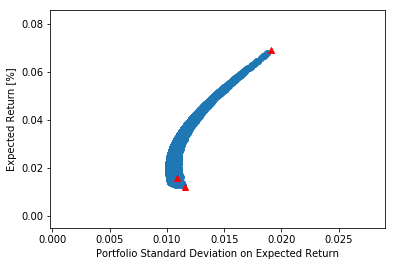

In [216]:
plt.scatter(output['pvar']**0.5, output['pret']*100)

for i in allquotes.keys()[1:]:
    plt.plot(allquotes[i].std(),allquotes[i].mean()*100,'r^')

plt.xlabel("Portfolio Standard Deviation on Expected Return")
plt.ylabel("Expected Return [%]")
plt.show()

We can now calculate the portfolio with the lowest risk

In [212]:
weights, varminrisk, retminrisk = get_min_std_portfolio(allquotes)

In [213]:
weights

array([ 0.3769812 ,  0.09661041,  0.5264084 ])

The standard deviation and expected return for this portfolio are

In [214]:
varminrisk**0.5, retminrisk

(0.010110136827401937, 0.019523735234775661)

## Include more assets

In [217]:
gilead  = stock(isin='US3755581036')
flavors = stock(isin='US4595061015')
visa    = stock(isin='US92826C8394')
fuchs   = stock(isin='DE0005790430')
johnson = stock(isin='US4781601046')

In [218]:
allquotes = merge_quotes(gilead, flavors, visa, fuchs, johnson)

In [225]:
allweights, output = calculate_efficient_frontier(allquotes,niter=10000)

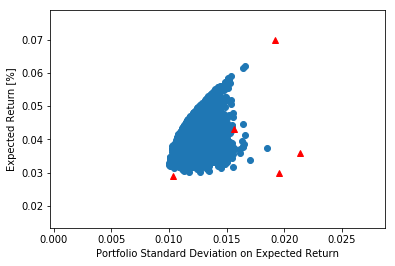

In [226]:
plt.scatter(output['pvar']**0.5, output['pret']*100)

for i in allquotes.keys()[1:]:
    plt.plot(allquotes[i].std(),allquotes[i].mean()*100,'r^')

plt.xlabel("Portfolio Standard Deviation on Expected Return")
plt.ylabel("Expected Return [%]")
plt.show()

In [227]:
weights, varminrisk, retminrisk = get_min_std_portfolio(allquotes,allweights=allweights, output=output)

In [229]:
weights, varminrisk**0.5, retminrisk

(array([ 0.08549853,  0.12377503,  0.02119382,  0.10874573,  0.66078689]),
 0.0099735647226369718,
 0.032303790598363337)

### Between Coca Cola and VISA

In [72]:
s.find_by_name("VISA")

,name,isin,ticker_YF,ticker_MS,branch,benchmark,finanzen_net
1081,"GRUPO TELEVISA CPO A,L,D",MXP4987V1378,TLV1,TLV1,0.0,XWD.TO,Grupo_Televisa_1
2886,"VISA INC. CL. A DL -,0001",US92826C8394,V,V,1.0,^GSPC,Visa


In [74]:
visa = stock(isin='US92826C8394')
visa._calculate_volatility()
visa.quote['dailyreturn'] = visa.dailychange
visa.dailychange.dropna(inplace=True)

In [76]:
both = pd.merge(cocac.quote, visa.quote,on='date')
both = both[['date','name_x','name_y','close_x','close_y','dailyreturn_x','dailyreturn_y']]

In [77]:
both[['dailyreturn_x','dailyreturn_y']].corr()

,dailyreturn_x,dailyreturn_y
dailyreturn_x,1.000000,0.326827
dailyreturn_y,0.326827,1.000000


In [79]:
visa.quote

,date,name,isin,exchange,currency,open,high,low,close,volume,dailyreturn
0,2008-03-19,"VISA INC. CL. A DL -,0001",US92826C8394,Y V,USD,14.875000,17.250000,13.750000,14.125000,708486000.0,0.138938
1,2008-03-20,"VISA INC. CL. A DL -,0001",US92826C8394,Y V,USD,14.600000,16.250000,14.375000,16.087500,198985200.0,-0.071795
2,2008-03-24,"VISA INC. CL. A DL -,0001",US92826C8394,Y V,USD,16.809999,16.924999,14.750000,14.932500,149566400.0,0.058932
3,2008-03-25,"VISA INC. CL. A DL -,0001",US92826C8394,Y V,USD,15.145000,16.062500,14.955000,15.812500,87092000.0,0.011225
4,2008-03-26,"VISA INC. CL. A DL -,0001",US92826C8394,Y V,USD,15.682500,16.120001,15.392500,15.990000,43111600.0,-0.016417
5,2008-03-27,"VISA INC. CL. A DL -,0001",US92826C8394,Y V,USD,16.012501,16.184999,15.662500,15.727500,39829600.0,-0.002384
6,2008-03-28,"VISA INC. CL. A DL -,0001",US92826C8394,Y V,USD,15.842500,15.860000,15.540000,15.690000,24675200.0,-0.006373
7,2008-03-31,"VISA INC. CL. A DL -,0001",US92826C8394,Y V,USD,15.650000,15.870000,15.512500,15.590000,22157200.0,-0.012027
8,2008-04-01,"VISA INC. CL. A DL -,0001",US92826C8394,Y V,USD,15.765000,15.920000,15.077500,15.402500,60410800.0,0.011524
9,2008-04-02,"VISA INC. CL. A DL -,0001",US92826C8394,Y V,USD,15.430000,15.580000,15.125000,15.580000,43836400.0,0.051027


# Plotting 

## Interactive Summary
Q-AnT includes a basic plotting algorithm to summarize essential quantities. It can be called using the following function which will load an interactive plot in a new tab.

In [15]:
s.interactive_summary()

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]
[ (3,1) x5,y5 ]  [ (3,2) x6,y6 ]
[ (4,1) x7,y7 ]  [ (4,2) x8,y8 ]



## Basic Plotting

2017-12-13 15:26:03  DE0005408116  AAREAL BANK AG    |deb|  Switched to new stock: AAREAL BANK AG
2017-12-13 15:26:03  DE0005408116  AAREAL BANK AG    |deb|  ISIN & Ticker:         DE0005408116, ARL
2017-12-13 15:26:03  DE0005408116  AAREAL BANK AG    |deb|  Reading saved quote
2017-12-13 15:26:03  DE0005408116  AAREAL BANK AG    |log|  Found 3993 quotes


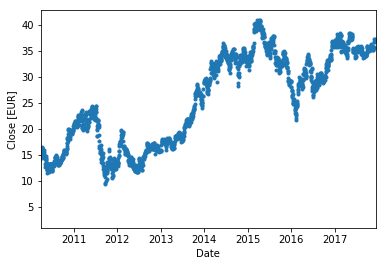

In [24]:
s.switch_isin('DE0005408116')
plt.plot(s.quote['date'], s.quote['close'],'.')
plt.xlabel("Date")
plt.ylabel("Close [EUR]")
plt.xlim(datetime.date(2010, 4, 1), datetime.date.today())
plt.show()

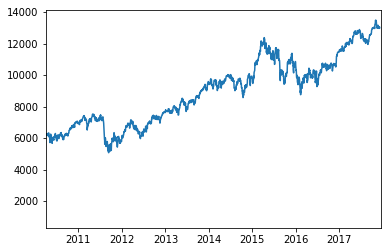

In [30]:
plt.plot(i.quote_saved['^GDAXI']['date'], i.quote_saved['^GDAXI']['close'])
plt.xlim(datetime.date(2010, 4, 1), datetime.date.today())

plt.show()

In [77]:
def merge_quotes(quote1, quote2):
    '''Returns a dataframe with the merged quotes'''
    newdf = pd.merge(quote1, quote2, how='inner',on='date')
    newdf = newdf[['date','name_x','name_y','close_x','close_y']]
    newdf = newdf.assign(return_x=newdf['close_x'].diff()/newdf['close_x'][1:])
    newdf = newdf.assign(return_y=newdf['close_y'].diff()/newdf['close_y'][1:])
    return newdf

In [80]:
newdf = merge_quotes(i.quote_saved['^GDAXI'], s.quote)
# newdf = newdf.head()
newdf.head()

,date,name_x,name_y,close_x,close_y,return_x,return_y
0,2002-03-21,DAX,AAREAL BANK AG,5348.680176,12.002167,NaN,NaN
1,2002-03-22,DAX,AAREAL BANK AG,5366.129883,12.291733,0.003252,0.023558
2,2002-03-25,DAX,AAREAL BANK AG,5317.379883,12.017184,-0.009168,-0.022846
3,2002-03-26,DAX,AAREAL BANK AG,5390.589844,11.852150,0.013581,-0.013924
4,2002-03-27,DAX,AAREAL BANK AG,5348.000000,11.927167,-0.007964,0.006290


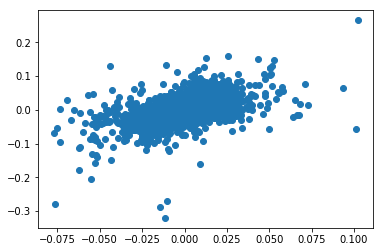

In [86]:
newdf[['return_x','return_y']].corr()

,return_x,return_y
return_x,1.000000,0.519849
return_y,0.519849,1.000000


In [192]:
def _assign_colnames(df):
    name = df['name'][0][0:6]
    df   = df[['date','close']]    
    df   = df.assign(dailyreturn=df['close'].diff()/df['close'][1:])
    df.columns = ['date','{0}'.format(name), 'return_{0}'.format(name)]    
    return df

def merge_quotes(*args):
    '''Merge multiple quote dataframes to allow studies of correlation'''
    newdf = _assign_colnames(args[0])
    for k in range(1,len(args)):
        dftoadd = _assign_colnames(args[k])
        newdf = pd.merge(newdf, dftoadd, how='inner',on='date')
    return newdf

In [193]:
df = merge_quotes(i.quote_saved['^GDAXI'], s.quote, t.quote)

In [194]:
df.corr()

,DAX,return_DAX,AAREAL,return_AAREAL,MUENCH,return_MUENCH
DAX,1.000000,0.027833,0.928955,0.014491,0.691363,0.037104
return_DAX,0.027833,1.000000,0.029771,0.518904,0.005662,0.740693
AAREAL,0.928955,0.029771,1.000000,0.032601,0.656505,0.030413
return_AAREAL,0.014491,0.518904,0.032601,1.000000,0.001516,0.388952
MUENCH,0.691363,0.005662,0.656505,0.001516,1.000000,0.019396
return_MUENCH,0.037104,0.740693,0.030413,0.388952,0.019396,1.000000


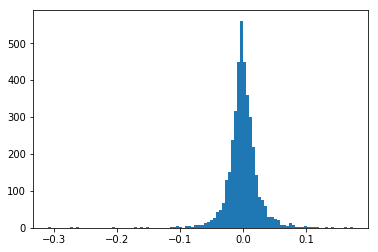

In [199]:
plt.hist((df['return_AAREAL']-df['return_DAX'])[1:],bins=100)
plt.show()

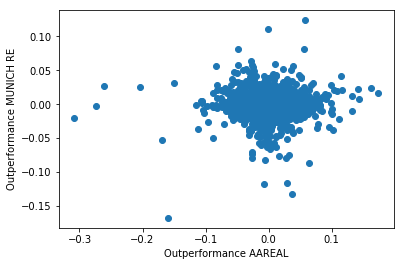

In [202]:
plt.plot(df['return_AAREAL']-df['return_DAX'], df['return_MUENCH']-df['return_DAX'],'o')
plt.xlabel("Outperformance AAREAL")
plt.ylabel("Outperformance MUNICH RE")
plt.show()

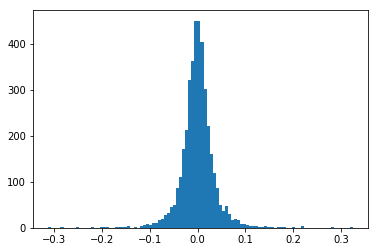

In [206]:
plt.hist(np.diff(df['return_AAREAL']-df['return_DAX'])[1:],bins=100)
plt.show()

In [96]:
t = stock(verbose=True, isin='DE0008430026')

2017-12-13 16:23:27  DE0008430026  MUENCH.RUECKVERS. |log|  Found 4958 quotes
2017-12-13 16:23:28  DE0008430026  MUENCH.RUECKVERS. |log|  Found 4958 quotes


# Logging

The stock and index classes save every generated output to the logging databases stored in the files

    output/algo.log
    output/algo.err